<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%9C%EC%9E%91CV09_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz
!pip install pydot

In [2]:
import tensorflow.keras.layers as layers
import tensorflow as tf

In [3]:
import tensorflow.keras.layers as layers
import tensorflow as tf

In [4]:
inputs = layers.Input(shape=(572, 572, 1))

# Contracting path 시작
# [1]
conv0 = layers.Conv2D(64, activation='relu', kernel_size = 3)(inputs)
conv1 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv0)# Skip connection으로 Expanding path로 이어질 예정
conv2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv1)


# Q.위 이미지를 보고 [2]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv3 = layers.Conv2D(128, activation='relu', kernel_size = 3)(conv2)
conv4 = layers.Conv2D(128, activation='relu', kernel_size = 3)(conv3)# Skip connection으로 Expanding path로 이어질 예정
conv5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv4)


# Q.위 이미지를 보고 [3]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv6 = layers.Conv2D(256, activation='relu', kernel_size = 3)(conv5)
conv7 = layers.Conv2D(256, activation='relu', kernel_size = 3)(conv6)# Skip connection으로 Expanding path로 이어질 예정
conv8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv7)


# Q.위 이미지를 보고 [4]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv9 = layers.Conv2D(512, activation='relu', kernel_size = 3)(conv8)
conv10 = layers.Conv2D(512, activation='relu', kernel_size = 3)(conv9)# Skip connection으로 Expanding path로 이어질 예정
conv11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv10)


# [5]
conv12 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv11)
conv13 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv12)
# Contracting path 끝

# Expanding path 시작
# [6]
trans01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2, 2), activation='relu')(conv13)
crop01 = layers.Cropping2D(cropping=(4, 4))(conv10)
concat01 = layers.concatenate([trans01, crop01], axis=-1)

# [7]
conv14 = layers.Conv2D(512, activation='relu', kernel_size=3)(concat01)
conv15 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv14)
trans02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2, 2), activation='relu')(conv15)

# [8]
crop02 = layers.Cropping2D(cropping=(16, 16))(conv7)
concat02 = layers.concatenate([trans02, crop02], axis=-1)


# Q.위 이미지를 보고 [9]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv16 = layers.Conv2D(256, activation='relu', kernel_size=3)(concat02)
conv17 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv16)
trans03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2, 2), activation='relu')(conv17)


# Q.위 이미지를 보고 [10]번 블럭을 구현해 봅시다. (cropping=(40, 40))
crop03 = layers.Cropping2D(cropping=(40, 40))(conv4)
concat03 = layers.concatenate([trans03, crop03], axis=-1)


# Q.위 이미지를 보고 [11]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
conv18 = layers.Conv2D(128, activation='relu', kernel_size=3)(concat03)
conv19 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv18)
trans04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2, 2), activation='relu')(conv19)


# Q.위 이미지를 보고 [12]번 블럭을 구현해 봅시다. (cropping=(88, 88))
crop04 = layers.Cropping2D(cropping=(88, 88))(conv1)
concat04 = layers.concatenate([trans04, crop04], axis=-1)


# [13]
conv20 = layers.Conv2D(64, activation='relu', kernel_size=3)(concat04)
conv21 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv20)
# Expanding path 끝

outputs = layers.Conv2D(2, kernel_size=1)(conv21)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-netmodel")

In [5]:
model.summary()

Model: "u-netmodel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 572, 572, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 570, 570, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 568, 568, 64  36928       ['conv2d[0][0]']                 
                                )                                                        

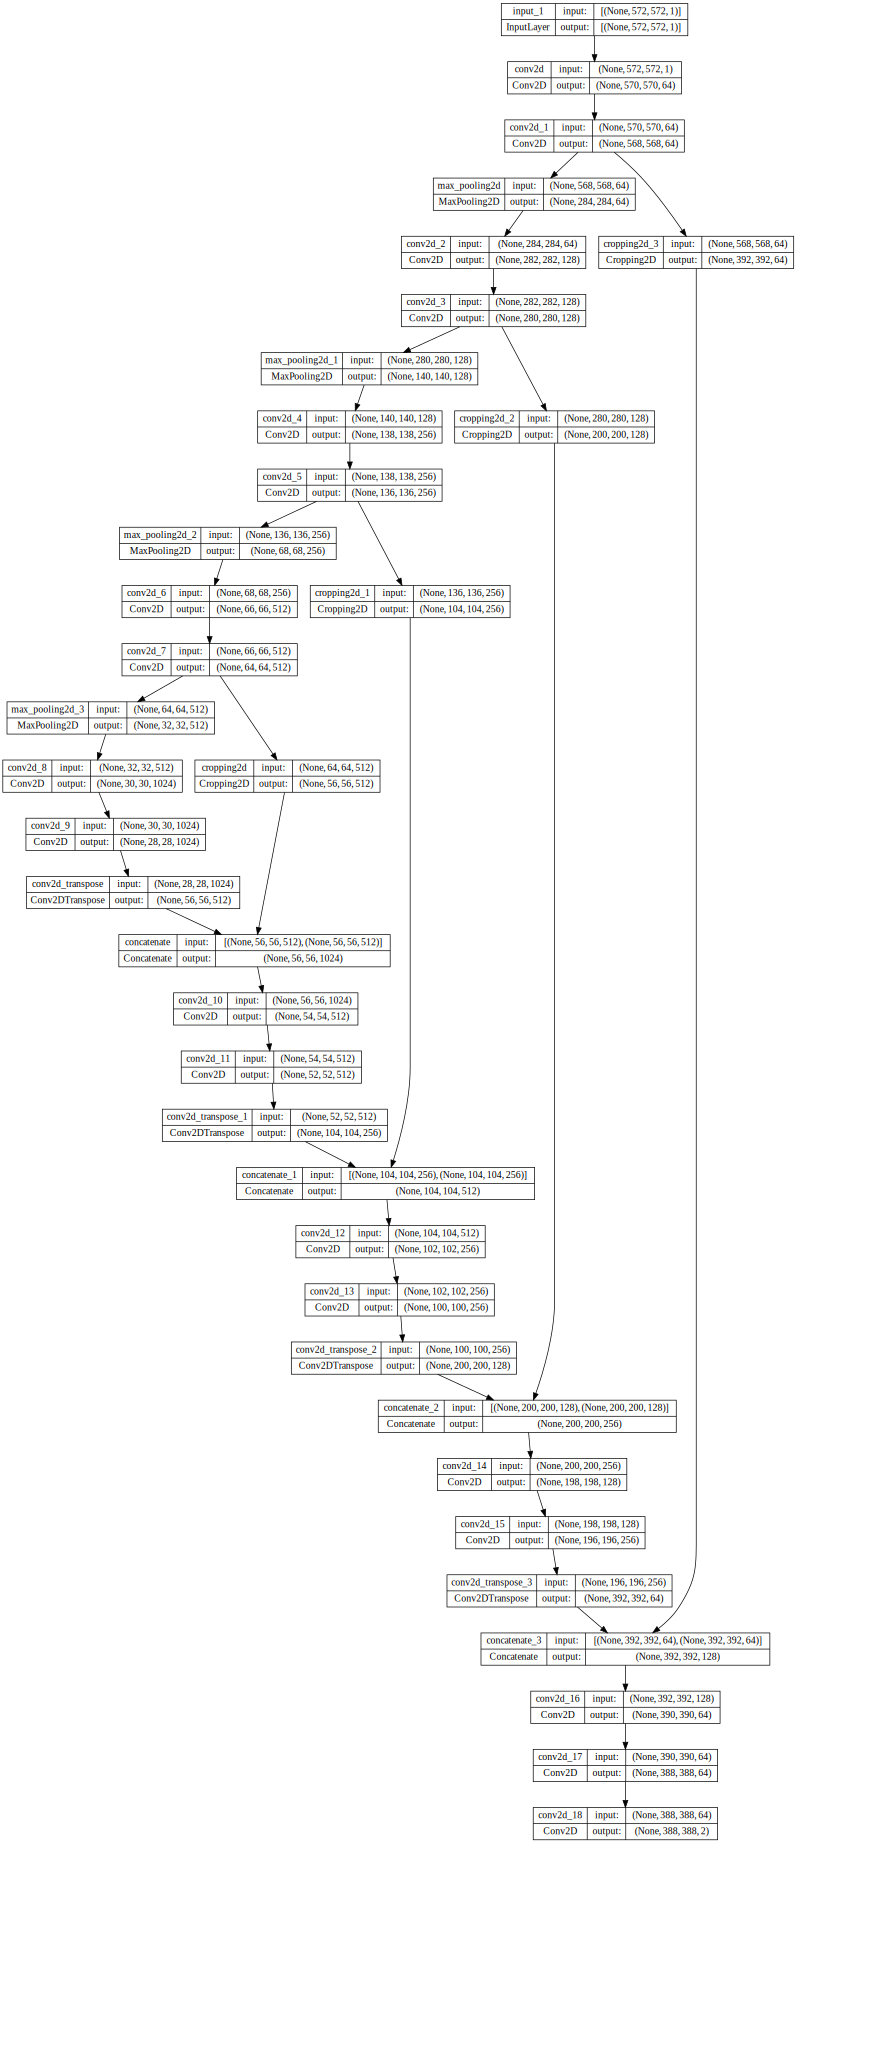

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=80).create(prog='dot', format='svg'))  #dpi를 작게 하면 그래프가 커집니다.

In [7]:
# Transposed Convolution을 코드로 살펴보기
# 필요한 모듈 불러오기
import numpy as np
import tensorflow as tf

In [8]:
# input data
X = np.asarray([[1, 2],
			  [3, 4]])

In [9]:
print(X)
print(X.shape)

[[1 2]
 [3 4]]
(2, 2)


In [10]:
# 모델에 맞게 reshaping
X = X.reshape((1, 2, 2, 1))

In [11]:
print(X)
print(X.shape)

[[[[1]
   [2]]

  [[3]
   [4]]]]
(1, 2, 2, 1)


In [12]:
# 모델 만들기
model = tf.keras.models.Sequential()
# Add input layer
model.add(tf.keras.layers.InputLayer(input_shape=(2, 2, 1)))

# Add Conv2DTranspose layer
model.add(tf.keras.layers.Conv2DTranspose(1, (1, 1), strides=(2, 2)))

In [13]:
weights = [np.asarray([[[[1]]]]), np.asarray([1])] # weight = 1, bias = 1

In [14]:
weights

[array([[[[1]]]]), array([1])]

In [15]:
model.set_weights(weights)

In [16]:
yhat = model.predict(X)
yhat = yhat.reshape((4, 4)) # 결과를 확인하기 편하게 reshaping
print(yhat)
print(yhat.shape)

1/1 [==============================] - 0s 251ms/step
[[2. 1. 3. 1.]
 [1. 1. 1. 1.]
 [4. 1. 5. 1.]
 [1. 1. 1. 1.]]
(4, 4)


In [17]:
# [Playground] 여러분만의 Transposed convolution 모델을 만들어 보고 model.predict()을 확인해 보세요.
# input data
X = np.asarray([[1, 2],
                [3, 4]])

print(X)
print(X.shape)

# reshaping to fit the model
X = X.reshape((1, 2, 2, 1))

print(X)
print(X.shape)

# Create the model
model = tf.keras.models.Sequential()

# Add input layer
model.add(tf.keras.layers.InputLayer(input_shape=(2, 2, 1)))

# Add Conv2DTranspose layer
model.add(tf.keras.layers.Conv2DTranspose(1, (1, 1), strides=(3, 3))) # 3배로 뻥튀기

# Set the weights
weights = [np.asarray([[[[1]]]]), np.asarray([1])] # weight = 1, bias = 1
model.set_weights(weights)

# Predict
yhat = model.predict(X)
yhat = yhat.reshape((6, 6)) # reshaping to make it easier to check the result, 2*3 =6
print(yhat)


[[1 2]
 [3 4]]
(2, 2)
[[[[1]
   [2]]

  [[3]
   [4]]]]
(1, 2, 2, 1)
1/1 [==============================] - 0s 59ms/step
[[2. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [4. 1. 1. 5. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
